<a href="https://colab.research.google.com/github/gigDevelopment10/Green-Email/blob/main/SolutionChallenge2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Green Email <br>
GreenMail is an email management tool that helps users reduce unnecessary emails and save cloud storage, it also helps in reducing their environmental impact by reducing their carbon footprint. It helps users declutter their inboxes and focus on the most important emails.

Contributors :
1. Amged Almogahed
2. Om Shrushe
3. Vaishnavi Narkhede
4. Zoya Jamadar

*Model Training Description* : Recurrent neural network is built and trained across 20 epochs — with the input layer comprised of an embedding layer which represents the sentences with dense vector representation.

In [79]:
import numpy as np 
import pandas as pd

In [80]:
dataset = pd.read_csv('spam.csv')
sentences = dataset['Message'].tolist()
labels = dataset['Category'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [81]:
train_labels = []
test_labels = []
for i in range(len(training_labels)):
  if(training_labels[i]=='ham'):
    train_labels.append(1)
  elif(training_labels[i]=='spam'):
    train_labels.append(0)

for i in range(len(testing_labels)):
  if(testing_labels[i]=='ham'):
    test_labels.append(1)
  elif(testing_labels[i]=='spam'):
    test_labels.append(0)

training_labels_final = np.array(train_labels)
testing_labels_final = np.array(test_labels)
print(training_labels_final)
print(testing_labels_final)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [82]:
dataset.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

In [83]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [87]:
sequences = tokenizer.texts_to_sequences(training_sentences)

In [88]:
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],steps_per_execution=None)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 6)                 9606      
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [91]:
num_epochs = 20 

In [ ]:
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [93]:
model.save('green-mail-rnn-v1')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7fb0261c9430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7fb0261c9430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [106]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),callbacks=[early_stop],verbose=2)

Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
140/140 - 1s - loss: 0.2944 - accuracy: 0.8645 - val_loss: 0.1728 - val_accuracy: 0.8700 - 1s/epoch - 8ms/step
Epoch 2/20
140/140 - 0s - loss: 0.1554 - accuracy: 0.9621 - val_loss: 0.1351 - val_accuracy: 0.9785 - 384ms/epoch - 3ms/step
Epoch 3/20
140/140 - 0s - loss: 0.1264 - accuracy: 0.9789 - val_loss: 0.1207 - val_accuracy: 0.9821 - 353ms/epoch - 3ms/step
Epoch 4/20
140/140 - 0s - loss: 0.1097 - accuracy: 0.9874 - val_loss: 0.1127 - val_accuracy: 0.9839 - 376ms/epoch - 3ms/step
Epoch 5/20
140/140 - 0s - loss: 0.0701 - accuracy: 0.9897 - val_loss: 0.0549 - val_accuracy: 0.9848 - 371ms/epoch - 3ms/step
Epoch 6/20
140/140 - 0s - loss: 0.0254 - accur

In [107]:
model.evaluate(testing_padded, testing_labels_final)

35/35 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9821


[0.05624110996723175, 0.9820627570152283]

Text(0.5, 0, 'epoch')

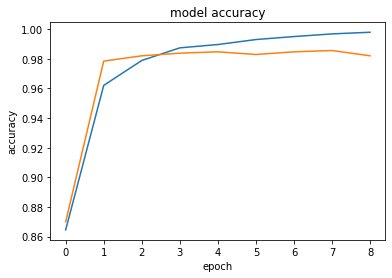

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [109]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded,steps=None))
predict_spam(predict_msg)

In [ ]:
import os 
model.save('green-mail-rnn-v1')